<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming for Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.2 - Exploratory data analysis
</div>

In [74]:
# import library
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
processed_df = pd.read_csv('./../data/Processed.csv', index_col=0)

In [76]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_number          2747 non-null   int64  
 1   quantity_ordered      2747 non-null   int64  
 2   price_per_unit        2747 non-null   float64
 3   orderline_number      2747 non-null   int64  
 4   sales                 2747 non-null   float64
 5   order_date            2747 non-null   object 
 6   days_since_lastorder  2747 non-null   int64  
 7   status                2747 non-null   object 
 8   productline           2747 non-null   object 
 9   retail_price          2747 non-null   int64  
 10  product_code          2747 non-null   object 
 11  customer_name         2747 non-null   object 
 12  phone                 2747 non-null   object 
 13  address               2747 non-null   object 
 14  city                  2747 non-null   object 
 15  postalcode            2747

### Q4: Does different in MSPR and price per unit affect the revenue?

Answer this question help:
- Nhà sản xuất có thể điều chỉnh chiến lược giá để tối ưu hóa doanh thu. Điều này có thể bao gồm xem xét giảm giá hoặc tăng giá trong các trường hợp cụ thể để đạt được hiệu suất kinh doanh tốt nhất
- Phân tích giá có thể giúp nhà sản xuất hiểu rõ mức độ nhạy cảm của khách hàng đối với sự chênh lệch giá. Có thể có các nhóm khách hàng có xu hướng phản ứng mạnh mẽ hơn hoặc yếu đối với sự biến động giá.

In [77]:
processed_df["price_diff"] = processed_df["price_per_unit"] - processed_df["retail_price"]

# Phân loại các khoảng chênh lệch giá và tính tổng doanh thu và số lượng sản phẩm bán ra cho mỗi bin
price_diff_bins = [processed_df["price_diff"].min(), -50, -10, 0, 10, 50, 100, processed_df["price_diff"].max()] 

processed_df['price_diff_bins'] = pd.cut(processed_df['price_diff'], bins=price_diff_bins)

# Tính tổng doanh thu và số lượng sản phẩm bán ra cho mỗi khoảng chênh lệch giá
price_diff_stats = processed_df.groupby('price_diff_bins').agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()


/tmp/ipykernel_152820/3317700704.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_diff_stats = processed_df.groupby('price_diff_bins').agg({'quantity_ordered': 'sum', 'sales': 'sum'}).reset_index()


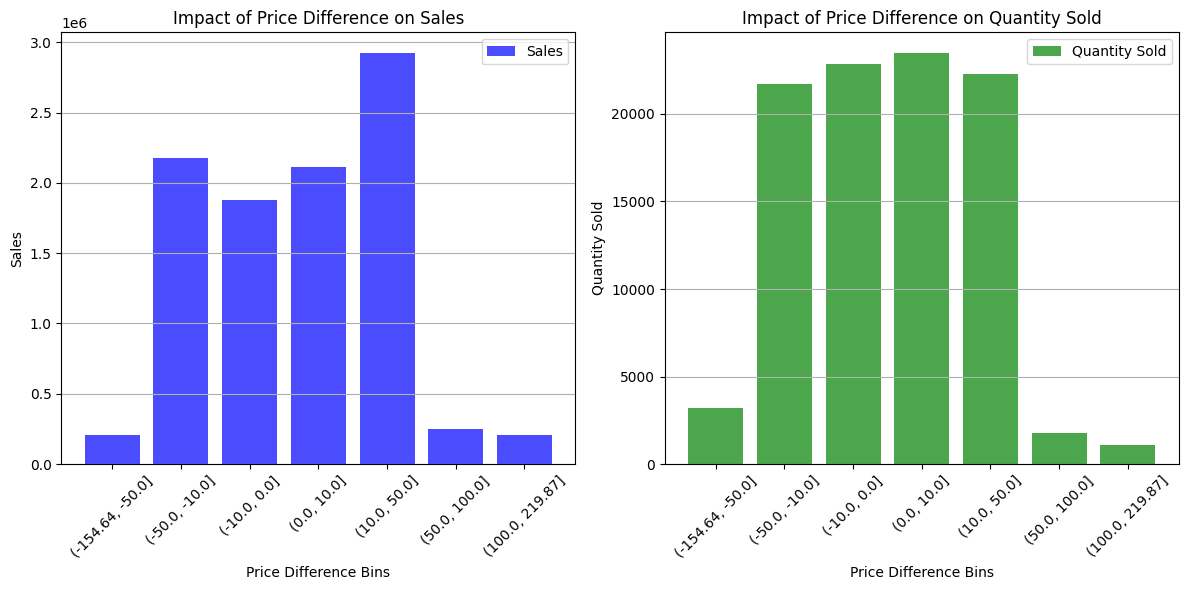

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Sales
ax[0].bar(price_diff_stats['price_diff_bins'].astype(str), price_diff_stats['sales'], color='blue', alpha=0.7, label='Sales')
ax[0].set_xlabel('Price Difference Bins')
ax[0].set_ylabel('Sales')
ax[0].set_title('Impact of Price Difference on Sales')
ax[0].legend()
ax[0].tick_params(axis='x', rotation=45) 
ax[0].grid(True, axis='y') 

# Quantity Sold
ax[1].bar(price_diff_stats['price_diff_bins'].astype(str), price_diff_stats['quantity_ordered'], color='green', alpha=0.7, label='Quantity Sold')
ax[1].set_xlabel('Price Difference Bins')
ax[1].set_ylabel('Quantity Sold')
ax[1].set_title('Impact of Price Difference on Quantity Sold')
ax[1].legend()
ax[1].tick_params(axis='x', rotation=45) 
ax[1].grid(True, axis='y')  

plt.tight_layout()

plt.show()


Nhận xét:
- Khách hàng có xu hướng khá nhạy cảm với giá
- Giá bán ra lớn hơn từ 50 đô trở đi cho sản phẩm làm người mua ngại bỏ ra số tiền của họ.
- Với giá cả quá thấp so với giá niêm yết, có thể đó là những sản phẩm out-dated nên không có được sức mua mạnh mẽ từ người dùng.

**-> Khách hàng có xu hướng mua mạnh khi chêch lệch giữa giá niêm yết và giá bán thực tế không quá nhiều:** mức độ chêch lệch khoảng 50 đô.





Tiếp theo, ta tìm hiểu thời gian mà doanh số tăng mạnh
- Giúp nhà sản xuất có thể dựa vào đó để có các chiến lược định giá, thu hút khách hàng

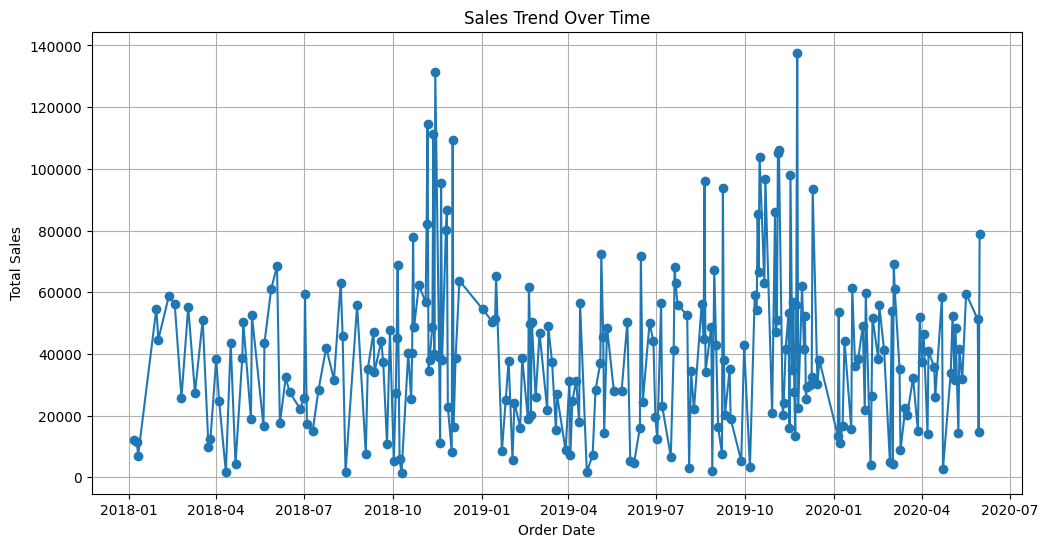

In [80]:

processed_df['order_date'] = pd.to_datetime(processed_df['order_date'])

sales_by_date = processed_df.groupby('order_date')['sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Từ biểu đồ, ta thấy được khoảng thời gian số lượng đặt hàng tăng mạnh là tầm khoảng tháng 10-12 hằng năm. Bởi lúc đó là dịp cuối năm, có nhiều đợt sale và lễ như Black Friday, Christmas...

**-> Nhà sản xuất nên tận dụng các dịp lễ, giáng sinh để điều chỉnh giá cả hợp lý, kích thích nhu cầu của khách hàng**


### Q5: Dựa trên phân loại khách hàng, cho biết.....(đang nghĩ content :<)

##### Preprocess: Classify customer base om **RFM**
- recency: 
- frequency:
- monetary:


In [83]:

processed_df['order_date'] = pd.to_datetime(processed_df['order_date'], dayfirst=True)

# Recency
processed_df['RECENCY'] = (pd.to_datetime('2020-7-31') - processed_df['order_date']).dt.days 

# Frequency
frequency = processed_df.groupby('customer_name').size().reset_index(name='Frequency')

# Monetary
monetary = processed_df.groupby('customer_name')['sales'].sum().reset_index(name='Monetary')

rfm = pd.merge(pd.merge(frequency, monetary, on='customer_name'), processed_df[['customer_name', 'RECENCY']], on='customer_name')

rfm_aggregated = rfm.groupby('customer_name').agg({'Frequency': 'mean', 'Monetary': 'sum', 'RECENCY': 'min'}).reset_index()

def rfm_segmentation(row):
    if row['RECENCY'] <= 365  and row['Frequency'] >= 40 and row['Monetary'] >= 600000:
        return 'Important Value Customer'
    elif row['Frequency'] < 20 and row['Monetary'] < 150000:
        return 'Low-Value Customer'
    else:
        return 'General Value Customer'

rfm_aggregated['Segment'] = rfm_aggregated.apply(rfm_segmentation, axis=1)

rfm_aggregated.rename(columns={'Frequency':'FREQUENCY', 'Monetary':'MONETARY','Segment':'SEGMENT'}, inplace=True)

rfm_aggregated

,customer_name,FREQUENCY,MONETARY,RECENCY,SEGMENT
0,"AV Stores, Co.",51.0,8048198.31,257,Important Value Customer
1,Alpha Cognac,20.0,1409768.80,125,General Value Customer
2,Amica Models & Co.,26.0,2447048.76,326,General Value Customer
3,"Anna's Decorations, Ltd",46.0,7083821.98,144,Important Value Customer
4,Atelier graphique,7.0,169259.72,249,General Value Customer
...,...,...,...,...,...
84,"Vida Sport, Ltd",31.0,3649120.36,336,General Value Customer
85,Vitachrome Inc.,25.0,2201031.50,269,General Value Customer
86,"Volvo Model Replicas, Co",19.0,1439342.72,255,General Value Customer
87,West Coast Collectables Co.,13.0,599100.32,549,General Value Customer


In [82]:
processed_df['customer_name'].nunique()

89